<a href="https://colab.research.google.com/github/PocachipMind/MS-AI-School/blob/main/3.Deep%20Learning/%EB%B3%B4%EC%8A%A4%ED%84%B4_%EC%A7%91%EA%B0%92_%EC%98%88%EC%B8%A1_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# 보스턴 주택 가격 데이터셋

from keras.datasets import boston_housing

(train_data, train_labels),(test_data,test_labels) =boston_housing.load_data()

In [13]:
train_data.shape

(404, 13)

In [14]:
test_data.shape

(102, 13)

In [15]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [16]:
mean = train_data.mean(axis=0)

In [17]:
mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [18]:
# train_data = train_data - mean 와 같은표현
train_data -= mean

In [19]:
# 표준 편차 구하기.
std = train_data.std(axis = 0)

In [20]:
# train_data = train_data / std 와 같은표현
train_data /= std

In [21]:
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [22]:
mean = test_data.mean(axis=0)
test_data -= mean
std = test_data.std(axis=0)
test_data /= std

In [23]:
test_data

array([[ 2.8040301 , -0.50784934,  0.96960877, ...,  0.90513041,
        -4.27829517,  2.51324773],
       [-0.55530596, -0.50784934, -0.17801704, ..., -0.28485844,
         0.3909446 ,  0.58604286],
       [-0.56808398, -0.50784934, -0.86176938, ...,  0.90513041,
         0.41570668, -0.38506427],
       ...,
       [-0.23539182, -0.50784934,  1.17955762, ..., -1.82192738,
         0.32313459, -1.55879807],
       [-0.5113909 , -0.50784934, -0.71849348, ..., -0.48318992,
         0.34967446, -0.38956708],
       [-0.03148414, -0.50784934,  1.17955762, ..., -1.82192738,
        -1.57465677, -0.3745577 ]])

In [36]:
# 신경망 만들기.
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1)) # 레그리션에선 없어도댐 기본설정이 항등함수이기 때문

  model.compile(optimizer='rmsprop', 
                loss='mse',
                metrics=['mae'])
  return model

In [40]:
# K-folder 검증
k = 4

num_val_samples = len(train_data) // k #폴더의 사이즈
all_scores = []

for i in range(k):
  print('처리중인 폴드 #',i)

  # 검증 데이터의의 준비: k번째 분할
  val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
  val_labels = train_labels[i * num_val_samples : (i+1) * num_val_samples]
  
  # 훈련 데이터의 준비 
  partial_train_data = np.concatenate(
      [train_data[: i* num_val_samples],
      train_data[(i+1)*num_val_samples:]],
      axis=0)
  partial_train_labels = np.concatenate(
      [train_labels[: i* num_val_samples],
      train_labels[(i+1)*num_val_samples:]],
      axis=0)
  
  model = build_model()
  model.fit(partial_train_data, 
            partial_train_labels,
            epochs=20,
            batch_size = 1,  # 메모리 걱정되어서
            verbose=0) # 실행결과 안나옴
  
  val_mse, val_mae = model.evaluate(val_data, val_labels, verbose=0) # 실행결과 안나옴
  all_scores.append(val_mae)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [41]:
all_scores

[2.094931125640869, 2.5203895568847656, 2.426612138748169, 2.4740729331970215]

In [42]:
np.mean(all_scores)

2.3790014386177063

In [43]:
# K-folder 검증
# 에포크 사이즈 늘려보기기
k = 4
num_epochs = 500

num_val_samples = len(train_data) // k #폴더의 사이즈
all_scores = []

for i in range(k):
  print('처리중인 폴드 #',i)

  # 검증 데이터의의 준비: k번째 분할
  val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
  val_labels = train_labels[i * num_val_samples : (i+1) * num_val_samples]
  
  # 훈련 데이터의 준비 
  partial_train_data = np.concatenate(
      [train_data[: i* num_val_samples],
      train_data[(i+1)*num_val_samples:]],
      axis=0)
  partial_train_labels = np.concatenate(
      [train_labels[: i* num_val_samples],
      train_labels[(i+1)*num_val_samples:]],
      axis=0)
  
  model = build_model()
  history = model.fit(partial_train_data, 
                      partial_train_labels,
                      epochs=num_epochs,
                      batch_size = 1,  # 메모리 걱정되어서
                      validation_data=(val_data, val_labels), # 핏하며 검증
                      verbose=0) # 실행결과 안나옴
  mae_histroy = history.history['mae']

  all_scores.append(mae_histroy)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [44]:
all_scores

[[11.177346229553223,
  3.8247921466827393,
  3.0929980278015137,
  2.8356950283050537,
  2.717872381210327,
  2.576688766479492,
  2.4749035835266113,
  2.447603225708008,
  2.3489701747894287,
  2.289564371109009,
  2.3066763877868652,
  2.25112247467041,
  2.2500205039978027,
  2.2472221851348877,
  2.1552722454071045,
  2.234682321548462,
  2.076143741607666,
  2.0682525634765625,
  2.032890796661377,
  2.046893358230591,
  1.988295555114746,
  2.046248197555542,
  1.9587057828903198,
  1.9829717874526978,
  1.930996060371399,
  1.9614384174346924,
  1.9901347160339355,
  1.9063347578048706,
  1.8901034593582153,
  1.8784046173095703,
  1.8836101293563843,
  1.894930124282837,
  1.859150767326355,
  1.8242830038070679,
  1.8542927503585815,
  1.8717758655548096,
  1.8172297477722168,
  1.7773278951644897,
  1.8348777294158936,
  1.7506276369094849,
  1.7770252227783203,
  1.7117605209350586,
  1.8028119802474976,
  1.6969239711761475,
  1.7250328063964844,
  1.679254412651062,
  1.

In [49]:
# 고인물들이 쓰는 코드
average_mae_history = [np.mean([x[i] for x in all_scores]) for i in range(num_epochs)]

Text(0, 0.5, 'Validation MAE')

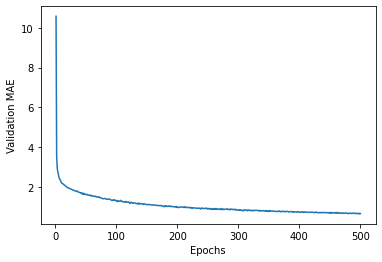

In [50]:
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')